In [1]:
# import the libraries
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
# size of the encoded representation, i.e. of the hidden layer
encoding_dim = 32
# MNIST image size - 28x28
input_img = Input(shape=(784,))
# encoding layer
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoding layer
decoded = Dense(784, activation='sigmoid')(encoded)

# The model
autoencoder = Model(input_img, decoded)

In [3]:
# Encoder model 
encoder = Model(input_img, encoded)

In [4]:
# Decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder = Model(encoded_input, autoencoder.layers[-1](encoded_input))

In [5]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [6]:
# labels aren't requried 
(x_train,_), (x_test,_) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True)

Epoch 1/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.3557
Epoch 2/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.2618
Epoch 3/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.2401
Epoch 4/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.2198
Epoch 5/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.2052
Epoch 6/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1951
Epoch 7/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1875
Epoch 8/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1808
Epoch 9/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1748
Epoch 10/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1693
Epoch 11/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1645
Epoch 12/50
60000/60000 [===========================

In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

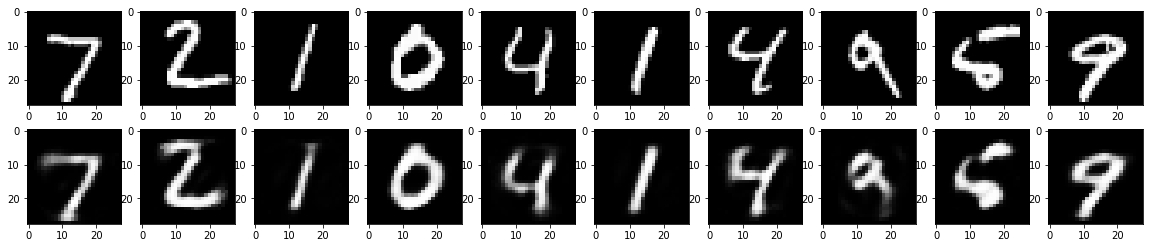

In [12]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # input images
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    # reconstructed images
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    
plt.show()